# CASE STUDY 1: Cohort Analysis with Python 

### Notes:

Cohort refers to the customer segment.

Customer segment is defined by:
- Time i.e when did we acquire the customer e.g invoice date
- Size i.e spending volume
- Behavior i.e Transaction patterns.

- Cohort Analysis is usually performed using Pivot tables which are visualized as heat maps.

In the heat map
- Rows = Activity & Month of Acquisition.
- Columns = Retention & Months Since Acquisition.

In [18]:
#loasd libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings(action = "ignore")

### Data Exploration

In [4]:
df = pd.read_excel("Online Retail.xlsx")

> Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


> Misssing Values

In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- 135080 records don't have customer ID's. This 24% of the data.
- The records were dropped since the missing records count is immaterial.

> Dropping Missing values

In [9]:
#Dropping na records
df = df.dropna(subset = ['CustomerID'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Data Transformation

> Converting invoice date column to yyyy-mm-dd format

- To faciliate the cohort analysis we convert the invoice date to the yyyy-mm-dd format such that each date is the first date of the month. So any customer who joins in the same are treated in the same cohort regradless of the day and time.
- This new variable will later be used to create a cohort month.

In [13]:
df['InvoiceMonth'] = df['InvoiceDate'].map(lambda x: dt.datetime(x.year, x.month, 1))

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


> Creating a cohort Month

- This variable tells us the month when each customer was first acquired. 

In [16]:
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


> Cohort Index

- Tracks retention from when the customer was acquired (cohort month) and when they were last active (invoice date). In otherwords, how long have you been in the system.
- We shall need to compute the following variables: `year_diff = (invoice_year - cohort_year)`, `month_diff = (invoice_month - cohort_month)`
- Then we express the 2 variables in terms of month to get the `cohort index = (year_diff * 12) + month_diff + 1`.
- The `+ 1` is cater for customers where active for 1 month i.e invoice_month = cohort_month is an edge case.

In [19]:
#helper fucntion that extracts month and year
def GetMonthYear(df, col):
    month = df[col].dt.month
    year = df[col].dt.year
    return month, year

In [20]:
invoice_month, invoice_year = GetMonthYear(df, 'InvoiceMonth')
cohort_month, cohort_year = GetMonthYear(df, 'CohortMonth')

In [24]:
#computing the differences.
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
df['CohortIndex'] = (year_diff * 12) +  month_diff + 1

In [25]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


### Pivot Table

A pivot table is an interactive,, drag-and-drop tool in spreadsheet applications (like Excel) that summarizes, reorganizes, and analyzes large datasets without altering the raw data. It is essential for instantly aggregating data (sums, averages, counts), identifying trends, and creating, interactive reports, enabling quick decision-making. 

> get the distinct counts of customers grouped by cohort month & cohort index

In [31]:
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [32]:
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


> create pivot table.

In [37]:
cohort_table = cohort_data.pivot(index = 'CohortMonth', columns= 'CohortIndex', values='CustomerID')

#convert it to row_percentages.
cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

#pretty Cohort Month formatting
cohort_table.index = cohort_table.index.strftime('%B %Y')

cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Heat Map

<AxesSubplot: xlabel='CohortIndex', ylabel='CohortMonth'>

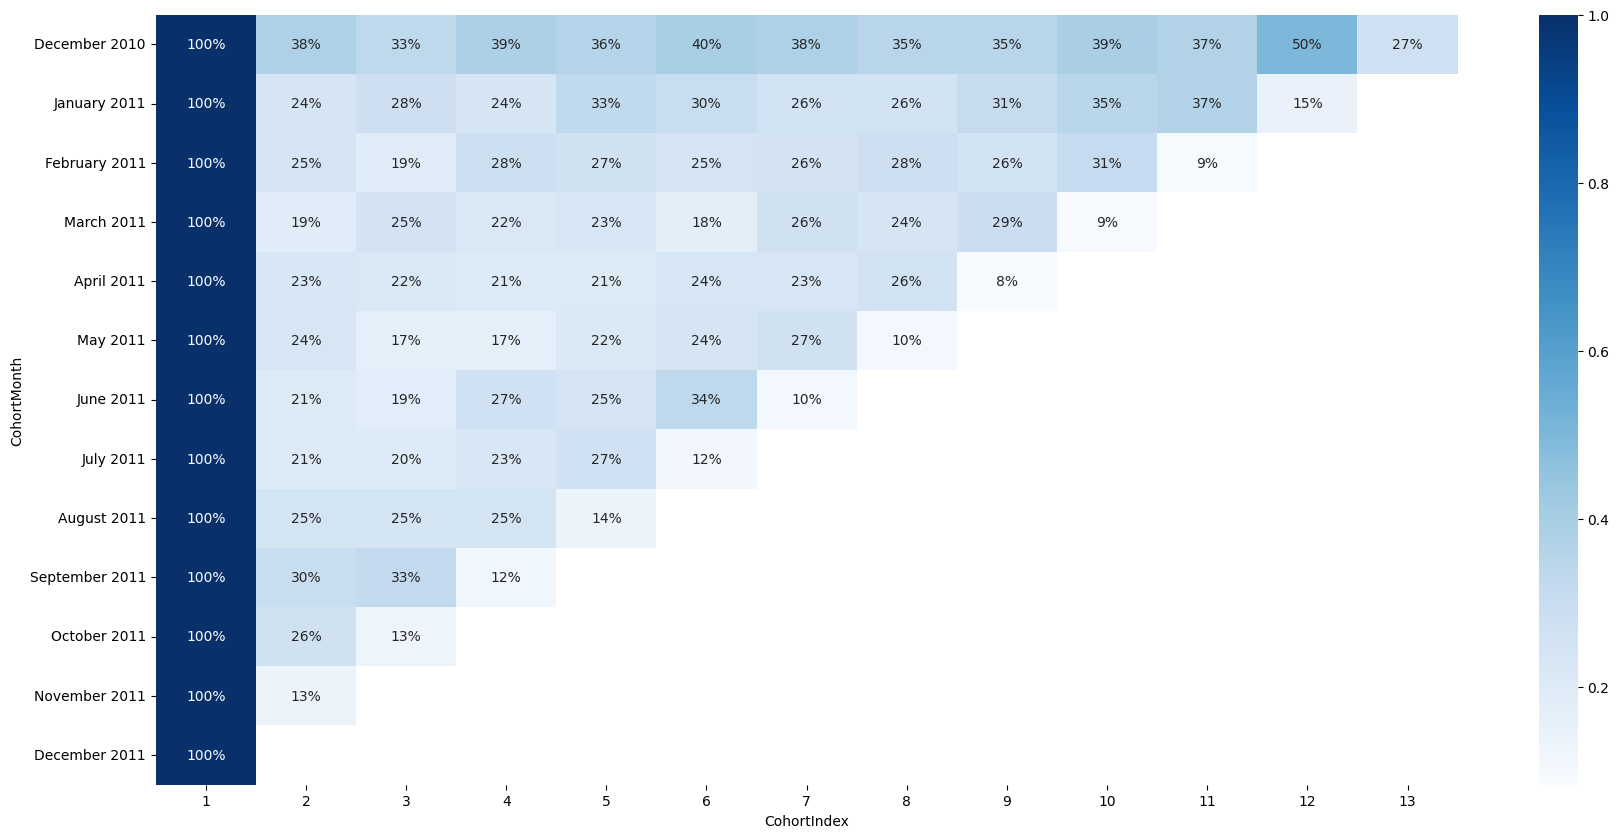

In [41]:
plt.figure(figsize=(21, 10))
sns.heatmap(cohort_table, annot=True, cmap= 'Blues', fmt ='.0%')

### Observations

1. The biggest retention problem is in the first 30–60 days, not later in the lifecycle.
    - Every cohort starts at 100% in month 1, which tells us acquisition is consistent.
    - Retention drops quickly by month 2 (mostly 20–40%), meaning a large share of users churn very early.

2. There’s a core group of loyal users once activation is achieved.
    - After month 3–4, retention declines more gradually.
    - Users who survive past the early months tend to stick around longer.

3. Product changes, user mix, or acquisition channels may have reduced user quality over time.
    - Early cohorts (e.g., Dec 2010 – Mar 2011) show higher mid-term retention (30–40%).
    - Later cohorts (mid–late 2011) tend to drop faster and settle lower.

4. Retention isn’t purely passive — reactivation or seasonal effects are likely at play.
    - Some cohorts show unexpected increases in later months (e.g., Dec 2010 jumps to ~50% in month 12).

5. Even the best cohorts decline steadily over time.


### Recommendations

- Improve onboarding, first-value experience, activation nudges, and early engagement incentives.
- Identify behaviors of users who reach month 3+ and engineer those behaviors earlier (product usage patterns, features, frequency).
- Review product or pricing changes introduced mid-2011.
- Map spikes to campaigns, promotions, feature launches, or seasonality.
- 

### Conclusion

Our growth problem isn’t acquisition — it’s early retention. Users who get past the first 2–3 months tend to stay, but recent cohorts are weaker, suggesting declining acquisition quality or product-market fit drift.

# Case 2: Customer Retention Analysis

### About Data set

- it has 3 sub data sets:
    1. `User registration Data`: includes User ID and whether user is a premium subscriber or not.
    2. `Mobile orders data`: includes User ID and total number of mobile orders placed in life time by each user.
    3. `in store orders` : includes User ID and total number of in store orders placed in life time by each user.

In [44]:
### Libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go

### Data Exploration

####  user's Registration data

In [48]:
#users data
users = pd.read_excel('user_purchase_data.xlsx', sheet_name= 'user_registration')
users.sample(5)

,userID,is_subscriber
70438,70439,No
130771,130772,No
53180,53181,No
199141,199142,No
37393,37394,No


In [49]:
#Dimension
users.shape

(201217, 2)

> Check for Null Values

In [51]:
users.isna().sum()

userID           0
is_subscriber    0
dtype: int64

- *There are no missing values in this data*

> check if all records are unique

In [57]:
users.userID.nunique() == users.shape[0]

True

- *All user IDs are unique.*

> Distribution of premium vs freemium subscribers.

<AxesSubplot: >

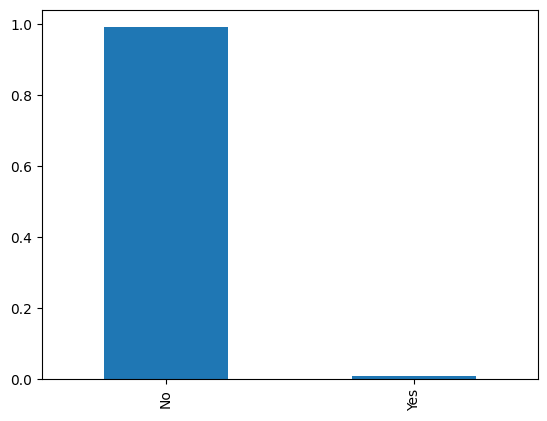

In [66]:
users.is_subscriber.value_counts(dropna = False, normalize= True).plot(kind = 'bar')

- *Imbalanced data as there are only 0.79%  premium subscribers and the rest are freemium*

#### Mobile Orders' data

In [67]:
mobile = pd.read_excel('user_purchase_data.xlsx', sheet_name= 'mobile_orders')
mobile.sample(5)

,user_id,mobile_orders
7363,10533,2
129367,183739,1
52211,74504,2
50534,72065,6
101088,143681,1


In [68]:
#Dimension
mobile.shape

(141690, 2)

> Check for null values

In [69]:
mobile.isna().sum()

user_id          0
mobile_orders    0
dtype: int64

- *No missing values*

> Check for duplicates

In [72]:
mobile.duplicated().sum()

0

- *All records are unique*

> Distribution of mobile orders

In [75]:
round(mobile.mobile_orders.describe(), 2)

count    141690.00
mean          9.57
std          24.14
min           1.00
25%           2.00
50%           4.00
75%           8.00
max        1174.00
Name: mobile_orders, dtype: float64

- The average mobile order is ~10 per user
- minimum order is 1 per user
- Medium order is 4 per user
- 75% of users have orders less than 8.

> Histogram

<AxesSubplot: ylabel='Frequency'>

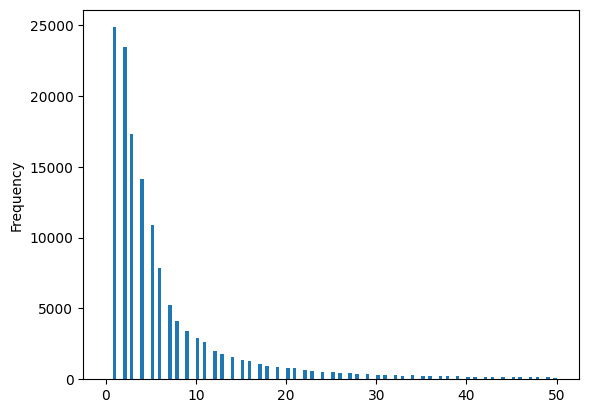

In [77]:
mobile.mobile_orders.plot(kind = 'hist', bins = 130, range = [0,50])

- *Mobile orders are right skewed. Implying that most users order a few items like 10 and below.*

> Users who placed order in the past but aren't active now (Deleted Accounts)

In [84]:
inactive = mobile[~ mobile['user_id'].isin(users['userID'])]

In [85]:
inactive.shape[0]

1827

- *There are 1827 such inactive users.*

#### Instore Orders' data

In [90]:
in_store =  pd.read_excel('user_purchase_data.xlsx', sheet_name='in_store_orders')
in_store.sample(5)

,user_id,in_store_orders
14152,53481,39
34110,128661,27
28121,106014,22
16092,60559,56
20690,77760,6


In [91]:
in_store.shape

(53287, 2)

> Null values check

In [92]:
in_store.isna().sum()

user_id            0
in_store_orders    0
dtype: int64

- No missing values.

> Duplicates

In [93]:
in_store.duplicated().sum()

0

- There are all unique records.

> Distribution of data

In [95]:
round(in_store.in_store_orders.describe(), 2)

count    53287.00
mean        23.85
std         55.01
min          1.00
25%          3.00
50%          9.00
75%         24.00
max       1419.00
Name: in_store_orders, dtype: float64

- The average mobile order is ~24 per user
- minimum order is 1 per user
- Medium order is 9 per user
- 75% of users make orders less than 24.

- *The number of instore orders per user is higher than mobile orders on average.Which may imply that most users prefer to order in store.*

> Histogram.

<AxesSubplot: ylabel='Frequency'>

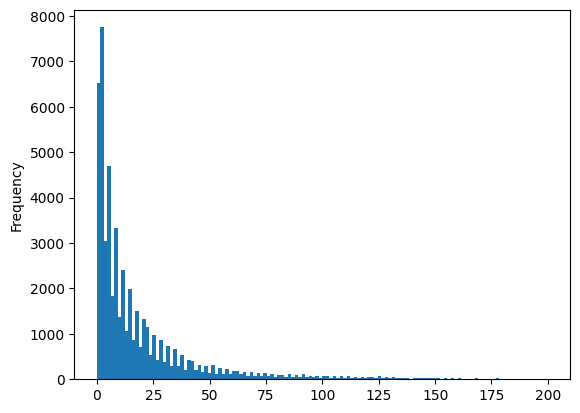

In [103]:
in_store.in_store_orders.plot(kind = 'hist', bins = 130, range = [0,200])

- *instore orders are right skewed. Implying that most users order a few items like 23 and below.*

> Users who placed order in the past but aren't active now (Deleted Accounts)

In [100]:
inactive2 = in_store[~ in_store['user_id'].isin(users['userID'])]

In [102]:
inactive2.shape[0]

1554

- There are 1554 such users. We can send the list of deleted accounts to the marketing team to target campaigns on them.

### Data Manipulation

> Rename column name in users

In [106]:
users.rename(columns= {'userID': 'user_id'}, inplace  = True)

> Create new column specifying category as Premium or Free

In [109]:
users['user_category'] = users['is_subscriber'].map(lambda x: 'Premium' if x == 'Yes' else 'Free')

> Drop subscriber column

In [111]:
users.drop(['is_subscriber'], axis = 1, inplace = True)

In [112]:
users.head()

,user_id,user_category
0,1,Free
1,2,Free
2,3,Free
3,4,Free
4,5,Free


> Merge Tables : Left Join Tables

- We want to focus on users who are currently active in the user's table.
- Replace all NaN with zero because such users didn't place any orders.

In [144]:
orders = pd.merge(users, mobile, how = 'left', on = 'user_id').merge(in_store, how = 'left', on = 'user_id')

In [145]:
orders.head()

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,NaN,NaN
1,2,Free,5.0,NaN
2,3,Free,NaN,NaN
3,4,Free,2.0,NaN
4,5,Free,5.0,26.0


In [146]:
orders.isna().sum()

user_id                 0
user_category           0
mobile_orders       61354
in_store_orders    149484
dtype: int64

- *There are `61,354` active users who have never placed a mobile order & `149,484` active users whao have never placed an in store order.*

> Address missing Orders.

In [147]:
orders = orders.fillna(0)

In [148]:
orders.head()

,user_id,user_category,mobile_orders,in_store_orders
0,1,Free,0.0,0.0
1,2,Free,5.0,0.0
2,3,Free,0.0,0.0
3,4,Free,2.0,0.0
4,5,Free,5.0,26.0


> Create Total Orders column

In [149]:
orders['total_orders'] = orders['mobile_orders'] + orders['in_store_orders']
orders['total_orders'] = orders['total_orders'].astype(int) # because it's discrete.

> Drop mobile and instore orders

In [150]:
orders.drop(columns=['mobile_orders',	'in_store_orders'], axis = 1, inplace = True)

In [151]:
orders.head()

,user_id,user_category,total_orders
0,1,Free,0
1,2,Free,5
2,3,Free,0
3,4,Free,2
4,5,Free,31


> Distribution of merged data set

In [152]:
round(orders.total_orders.describe(), 2)

count    201217.00
mean         12.95
std          46.35
min           0.00
25%           1.00
50%           3.00
75%           9.00
max        2279.00
Name: total_orders, dtype: float64

- The average total order is ~ 13 orders
- Minimum = 0 orders
- 75% of users have total orders below 9 orders.
- Medium total number of orders is 3

<AxesSubplot: ylabel='Frequency'>

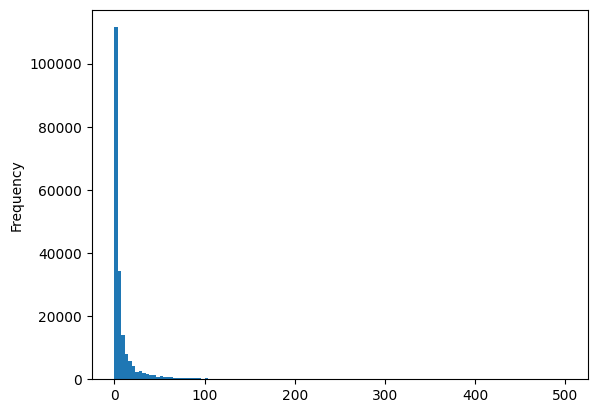

In [153]:
orders.total_orders.plot(kind = 'hist', range = [0, 500], bins = 130)

- The total orders are right skewed. Implying that majority order 13 or less items.

> Creating indicator columns for order bins

- It allows to study how users behave relative to the increase in number of orders. 

In [156]:
#bins for studying customer retention over seeveral min orders
order_bins = list(range(0, 13)) + list(range(15, 65, 5)) + list(range(70, 110, 10)) + list(range(120, 220, 20)) + list(range(250, 650, 50)) + list(range(700, 1200, 100))

In [157]:
for order_bin in order_bins:
    orders['orders >=' + str(order_bin)] = [1 if order >= order_bin else 0 for order in orders['total_orders'].values]

In [160]:
pd.set_option('display.max_columns', None)
orders.head()

,user_id,user_category,total_orders,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=9,orders >=10,orders >=11,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,1,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Free,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Free,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Free,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Free,31,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


*- It's observed that as order increase, the are fewer purchases from the users.*

> Dropping un required columns.

In [162]:
totals = orders.drop(columns= ['user_id', 'total_orders'], axis = 1)

In [163]:
totals.head()

,user_category,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=9,orders >=10,orders >=11,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Free,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Free,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Free,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Free,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> Total Orders grouped by User category (Pivoted)

In [164]:
sum_cols = totals.columns.tolist()[1:]

In [167]:
totals = totals.groupby('user_category')[sum_cols].sum().reset_index()
totals

,user_category,orders >=0,orders >=1,orders >=2,orders >=3,orders >=4,orders >=5,orders >=6,orders >=7,orders >=8,orders >=9,orders >=10,orders >=11,orders >=12,orders >=15,orders >=20,orders >=25,orders >=30,orders >=35,orders >=40,orders >=45,orders >=50,orders >=55,orders >=60,orders >=70,orders >=80,orders >=90,orders >=100,orders >=120,orders >=140,orders >=160,orders >=180,orders >=200,orders >=250,orders >=300,orders >=350,orders >=400,orders >=450,orders >=500,orders >=550,orders >=600,orders >=700,orders >=800,orders >=900,orders >=1000,orders >=1100
0,Free,199633,150055,127507,105052,88675,76665,66874,59841,54505,50176,46510,43316,40463,34116,26777,21938,18467,15787,13669,11960,10551,9377,8452,6985,5922,5125,4442,3432,2761,2226,1805,1497,952,668,501,377,296,242,205,165,118,86,73,60,50
1,Premium,1584,1271,1162,1089,1032,972,915,863,804,773,741,716,692,635,548,489,455,410,380,362,330,317,307,277,257,227,201,171,153,137,113,105,90,73,58,51,45,43,41,37,29,24,19,12,7


> Unpivot totals aggregated table for visualization

In [208]:
graph_df = pd.melt(totals, id_vars= 'user_category', value_vars= sum_cols, var_name = 'order_bins', value_name='registered_users')

> Add an integer min order column 

In [209]:
graph_df['min_orders'] = [int(val.split('>=')[1]) for val in graph_df['order_bins']]
graph_df.drop(columns='order_bins', inplace = True)

In [210]:
graph_df

,user_category,registered_users,min_orders
0,Free,199633,0
1,Premium,1584,0
2,Free,150055,1
3,Premium,1271,1
4,Free,127507,2
...,...,...,...
85,Premium,19,900
86,Free,60,1000
87,Premium,12,1000
88,Free,50,1100


> Converting registered users to percentages using a baseline min order

In [211]:
baseline = 1 #of min orders

graph_df['category_totals'] = [graph_df.loc[(graph_df['user_category'] == user_cat) & (graph_df['min_orders'] == baseline), 'registered_users'].max() 
             for user_cat in graph_df['user_category']]

In [212]:
graph_df

,user_category,registered_users,min_orders,category_totals
0,Free,199633,0,150055
1,Premium,1584,0,1271
2,Free,150055,1,150055
3,Premium,1271,1,1271
4,Free,127507,2,150055
...,...,...,...,...
85,Premium,19,900,1271
86,Free,60,1000,150055
87,Premium,12,1000,1271
88,Free,50,1100,150055


In [213]:
graph_df['%registered_users'] = graph_df['registered_users'] / graph_df['category_totals']

> Drop unwanted columns.

In [214]:
graph_df.drop(columns = ['registered_users', 'category_totals'])

,user_category,min_orders,%registered_users
0,Free,0,1.330399
1,Premium,0,1.246263
2,Free,1,1.000000
3,Premium,1,1.000000
4,Free,2,0.849735
...,...,...,...
85,Premium,900,0.014949
86,Free,1000,0.000400
87,Premium,1000,0.009441
88,Free,1100,0.000333


- The final data set for customer retention curve has the user_category, minimum orders and % of registered users as the features.

### Visualization

- For each user category we create a retention plot for %registered_users versus min_orders.

In [225]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

max_x_val = 1100
fig = go.Figure()

for cat in graph_df['user_category'].unique():
    fig.add_trace(go.Scatter(
        x=graph_df.loc[graph_df['user_category'] == cat, 'min_orders'],
        y=graph_df.loc[graph_df['user_category'] == cat, '%registered_users'],
        mode='lines+markers',
        name=f"{cat} Users",
        hovertemplate= '<b>%{y:.2%}</b>}'
    ))

fig.update_layout(
    xaxis_title="Minimum Orders",
    yaxis = {'title': "Registered Users (%)", 'tickformat': '.0%'},
    title = {'text': 'Retention Curve for Free vs. Premium Customers', 'y':0.85, 'x':0.46, 'xanchor': 'center', 'yanchor': 'middle'},
    hovermode = 'x unified'
)

fig.update_xaxes(range = [baseline, max_x_val])
fig.update_yaxes(range = [-0.01, 1.01])
fig.show()




> Interpreting values at min order = 12 when baseline = 1

- Of users who have at least purchased once (where base line = 1), 26.96% of free users have at least purchased 12 items and 54.4% of premium users have at least purchased 12 items.

- Overall premium users have a higher retention rate at each minimum order.

> Exporting the file name

In [226]:
fig.write_html('D:\\DS&AL\customer_retention_curve.html')

In [218]:
pwd

'D:\\DS&AL'